<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/classificationtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df.to_csv("/content/drive/MyDrive/Colab Notebooks/iris.csv", encoding="utf8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

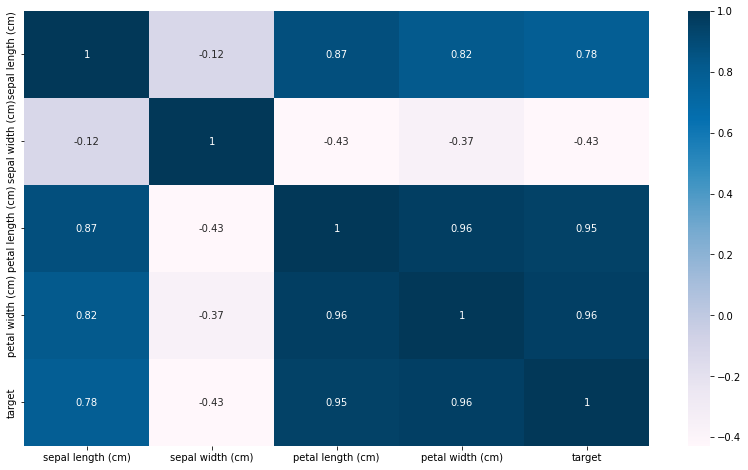

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14, 8))
sns.heatmap(df.astype("float").corr(), cmap="PuBu", annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split -> (特徵90%, 特徵10%, 目標90%, 目標10%)
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1) 
# drop del a row or a cloumn return new_df axit=1(column)/0(row)
# test_size 測試資料保留率

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

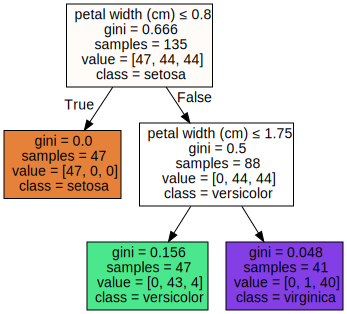

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, out_file=None, feature_names=iris["feature_names"],
                class_names=iris["target_names"], filled=True, special_characters=True)
graph = graphviz.Source(g)
graph

In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print("預測結果:", list(pre))
print("真正標籤", list(y_test))
print("正確率: ", accuracy_score(y_test, pre) * 100, "%")

預測結果: [2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1]
真正標籤 [2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2]
正確率:  93.33333333333333 %
